<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/0401_Registre-de-logs%20Rev%20C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
#import geocoder
import folium
import time
import urllib.request
import json
#import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 16.7 MB 18.5 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Tiene formato de código
```

# Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".


In [152]:
# Abro archivo

df = list(open('/content/drive/MyDrive/Web_access_log-akumenius.com.txt'))
df[200:210]

['www.akumenius.com 180.76.5.31 - - [23/Feb/2014:03:15:03 +0100] "GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Zurich_SUIZA-con-Alquiler-de-silla-de-ruedas HTTP/1.1" 200 8360 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:03 +0100] "GET /hoteles-baratos/ofertas-hotel-Capitolio-Apartamentos-Turisticos-en-Merida-207271b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /destinos-baratos/destinosEstrelles/hoteles-en-Gary_ESTADOS%20UNIDOS-con-4-estrellas HTTP/1.1" 200 8812 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /hoteles-baratos/ofertas-hotel-Guitart-Termes-La-Collada-en-La%20Molina-6833b-destinos.

# Creo un fichero de IPs chopeadas del original

In [153]:
print('NUmero de registros:')
len(df)

NUmero de registros:


261873

# Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [154]:
#2.- Separo la parte central.

def custom_split(str_to_split):
    separatorsCentro = "[", "]", "\s", ",",' ','+', ')', '(', '"'
    # create regular expression dynamically
    regular_exp = '|'.join(map(re.escape, separatorsCentro))

    return re.split(regular_exp, str_to_split)

In [155]:
def separoCorchete ( textoCortar):
  separatorsCentro = "]"
  regular_exp = '|'.join(map(re.escape, separatorsCentro))

  return re.split(regular_exp, textoCortar)



In [156]:
def arregloFecha(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x, '%d/%b/%Y:%H:%M:%S')

    #dt = datetime.strptime(x[0:-9], '%d/%b/%Y:%H:%M:%S')
    #print('Fecha ', dt)
    #dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    #return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
    return dt

In [159]:
import re
 
chopear = input('Quieres abrir el fichero de nuevo y?'):
if chopper ='y' or chopper ='Y':
  texto=[]

    
  df1 = df.copy()
  data = {'virtual_host': [],    'IPs': [],    'Fecha': [],    'request': [],  'status': [], 'size': [], 'referer': [], 'user_agent': []}

  df_salida = pd.DataFrame(data)
  print('lineas total ------> ', len(df1))

  #for s, textoLinea  in enumerate(df1):
  #  print('Hola', s, textoLinea)

  for s, textoLinea  in enumerate(df1):
    #if len(textoLinea) == 23:
      #print ('---', s, textoLinea) 
    problematico= 0
    if s<10000000:
      textin = separoCorchete(textoLinea)

      #print(s, len(textin), textin[0])
      texto = custom_split(textin[0])
      nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5])}  # Lo tranformo en fecha
      #for p,q in enumerate(texto):
        #print(p, q)

      if s%10000 ==0 :
              print(s, 'Z--->', nueva_fila)
      #df_salida=pd.DataFrame.from_dict(nueva_fila, orient='index') 
      df_salida= df_salida.append(nueva_fila, ignore_index=True) 
      

    '''
    if s> problematico and s <= 300: # len(df1) :
      
      texto=custom_split(textoLinea)
      



      #print(s, len(texto), '<---', textoLinea) 
      #print( texto[5])
      #print('longitud', len(texto))  

      if len(texto)> 125:
        #print(s, texto[1])
        nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5]),  # Lo tranformo en fecha
            'request': texto[11],
            'status': texto[14],
            'size': texto[15], 
            'referer': texto[20]}

      else:
        #print (s,'MALO    long=',  len(texto), textoLinea)
        for p,q in enumerate(texto):
          print(p,q)
      
      
      if len(texto)> 23:            
            nueva_fila = {'user_agent': texto[23]}
      else:
        nueva_fila = {'user_agent': []}
      
      if len(texto)> 25:      
        nueva_fila = {'Navegador': texto[25]}
      else:
        nueva_fila = {'Navegador': []}
      
    '''
      
    
    #if len(texto) <=23:
      
      
          
  # Guardo la informacion en drive   
  path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
  df_salida.to_csv(path)
  #
  #df_salida.type
  print('Forma ', df_salida.shape)

  df_salida.head(-20)


lineas total ------>  261873
0 Z---> {'virtual_host': 'localhost', 'IPs': '127.0.0.1', 'Fecha': datetime.datetime(2014, 2, 23, 3, 10, 31)}
10000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '144.76.95.232', 'Fecha': datetime.datetime(2014, 2, 23, 10, 24, 39)}
20000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '180.76.5.171', 'Fecha': datetime.datetime(2014, 2, 23, 15, 14, 11)}
30000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '157.56.92.146', 'Fecha': datetime.datetime(2014, 2, 23, 19, 29, 16)}
40000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '66.249.76.216', 'Fecha': datetime.datetime(2014, 2, 23, 23, 40, 6)}
50000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '87.221.174.146', 'Fecha': datetime.datetime(2014, 2, 24, 9, 13, 48)}
60000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '83.37.239.190', 'Fecha': datetime.datetime(2014, 2, 24, 12, 43, 28)}
70000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '83.61.241.37', 'Fecha': datetime.datetime(2

,virtual_host,IPs,Fecha,request,status,size,referer,user_agent
0,localhost,127.0.0.1,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN
1,localhost,127.0.0.1,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN
2,localhost,127.0.0.1,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN
3,localhost,127.0.0.1,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN
4,localhost,127.0.0.1,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
261848,www.akumenius.com,66.249.76.216,2014-03-02 02:56:17,NaN,NaN,NaN,NaN,NaN
261849,www.akumenius.com,66.249.76.216,2014-03-02 02:57:21,NaN,NaN,NaN,NaN,NaN
261850,www.akumenius.com,66.249.76.216,2014-03-02 02:57:46,NaN,NaN,NaN,NaN,NaN
261851,www.akumenius.com,74.86.158.107,2014-03-02 02:59:52,NaN,NaN,NaN,NaN,NaN


In [160]:
print(type(df_salida))
print(df_salida.dtypes)
print('Tmaño: ', df_salida.shape)

<class 'pandas.core.frame.DataFrame'>
virtual_host            object
IPs                     object
Fecha           datetime64[ns]
request                float64
status                 float64
size                   float64
referer                float64
user_agent             float64
dtype: object
Tmaño:  (261873, 8)


# Abrir fichero de IPs creado

In [162]:
path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
df=  pd.read_csv(path)
print('Tamaño antes de tomar una muestra: ', df.shape)

#df = df.sample(frac = 0.5)
#df = df[1294:1305]
print(type(df))
print('Tamaño: ', df.shape)

Tamaño antes de tomar una muestra:  (261873, 9)
<class 'pandas.core.frame.DataFrame'>
Tamaño:  (261873, 9)


# Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

Lo primero que voy a hacer es minimizar la base de datos.
La manera que se me ha ocurrido es poner un contador por Ip y asi si hay IP repetidas solo la buscará una vez y tendre la cantidad en el df

In [163]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

,ip,visits
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558


In [10]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 5.7 MB/s 


In [68]:
import geocoder

ip = geocoder.ip("157.55.32.183")
print(ip.city)
print(ip)
print(ip.latlng)

Status code 429 from http://ipinfo.io/157.55.32.183/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/157.55.32.183/json


None
<[ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/157.55.32.183/json] Ipinfo - Geocode [empty]>
None


# Exercici 3
Geolocalitza les IP's.

In [59]:

location = geocoder.ip('66.249.76.216')

Status code 429 from http://ipinfo.io/66.249.76.216/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/66.249.76.216/json


In [164]:
posicion = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                posicion.append(data)


In [165]:
posicion = pd.DataFrame(posicion)
 
type(posicion)

pandas.core.frame.DataFrame

In [166]:
posicion['cantidad'] = data_ip['visits']
posicion = posicion[posicion['state']!= 'Not found']
posicion

,country_code,country_name,city,postal,latitude,longitude,IPv4,state,cantidad
0,US,United States,None,None,37.751,-97.822,66.249.76.216,None,46382
1,ES,Spain,Madrid,28045,40.4165,-3.7026,80.28.221.123,Madrid,14725
3,ES,Spain,Bormujos,41930,37.3736,-6.0723,217.125.71.222,Seville,5201
4,US,United States,None,None,37.751,-97.822,66.249.75.148,None,3558
5,US,United States,New York,10011,40.7308,-73.9975,162.243.192.191,New York,2927
...,...,...,...,...,...,...,...,...,...
2916,ES,Spain,Gandia,46701,38.9667,-0.1833,84.123.150.27,Valencia,1
2917,ES,Spain,None,None,40.4172,-3.684,217.130.150.116,None,1
2918,CN,China,None,None,34.7725,113.7266,202.46.52.23,None,1
2919,US,United States,None,None,37.751,-97.822,216.151.130.170,None,1


In [179]:
  # Guardo el archivo con la geoposiciones

  path = ('/content/drive/MyDrive/01_COLAB/' +'GEOdirecionesIP.csv')
  posicion.to_csv(path)

In [80]:
!pip install geopandas
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
posicion['latitude'].astype(float, errors = 'raise')
posicion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2920
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  2906 non-null   object
 1   country_name  2906 non-null   object
 2   city          1804 non-null   object
 3   postal        1631 non-null   object
 4   latitude      2919 non-null   object
 5   longitude     2919 non-null   object
 6   IPv4          2919 non-null   object
 7   state         2200 non-null   object
 8   cantidad      2919 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 228.0+ KB


In [168]:
gdf = geopandas.GeoDataFrame(
    posicion, geometry=geopandas.points_from_xy(posicion.longitude,posicion.latitude))

In [169]:
gdf.head()

,country_code,country_name,city,postal,latitude,longitude,IPv4,state,cantidad,geometry
0,US,United States,None,None,37.751,-97.822,66.249.76.216,None,46382,POINT (-97.82200 37.75100)
1,ES,Spain,Madrid,28045,40.4165,-3.7026,80.28.221.123,Madrid,14725,POINT (-3.70260 40.41650)
3,ES,Spain,Bormujos,41930,37.3736,-6.0723,217.125.71.222,Seville,5201,POINT (-6.07230 37.37360)
4,US,United States,None,None,37.751,-97.822,66.249.75.148,None,3558,POINT (-97.82200 37.75100)
5,US,United States,New York,10011,40.7308,-73.9975,162.243.192.191,New York,2927,POINT (-73.99750 40.73080)


In [170]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

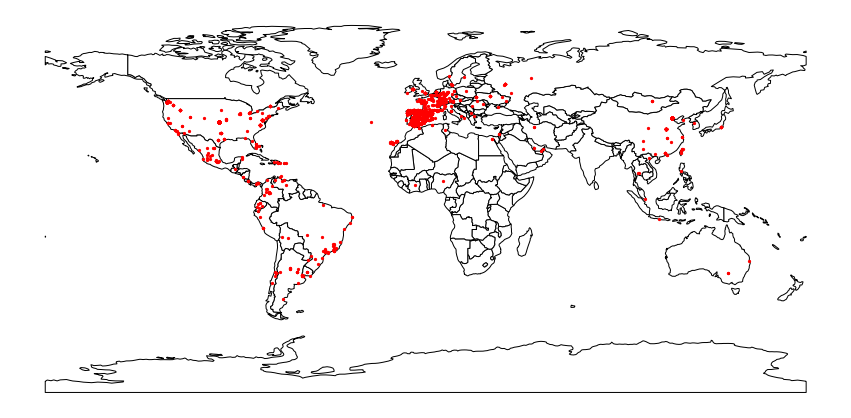

In [171]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

In [14]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=3)
mc = MarkerCluster()

In [148]:
#! pip install geocoder

In [177]:
for i in range(0,len(posicion)):
    mc.add_child(folium.Marker(
        location=[posicion.iloc[i]["latitude"],posicion.iloc[i]["longitude"]],
        popup=str(posicion.iloc[i]["cantidad"]),))

In [178]:
m.add_child(mc)

In [ ]:
https://datasciencesphere.com/project/track-location-ip-address-python-geocoder/

# Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

https://datasciencesphere.com/project/track-location-ip-address-python-geocoder/

In [ ]:
ip = geocoder.ip("me")
ip

print(ip.latlng)

<[OK] Ipinfo - Geocode [North Charleston, South Carolina, US]>

In [ ]:
g = geocoder.ip('74.125.226.99')
>>> g.address

In [ ]:
import requests

url = 'https://maps.googleapis.com/maps/api/geocode/json'
r = requests.get(url, params={
    'sensor': 'false', 
    'address': 'Centre Pompidou, Paris, FR'
})

results = r.json()['results']
results
#location = results[0]['geometry']['location']
#lat, lng = location['lat'], location['lng']

[]

https://janakiev.com/blog/geocoding-in-python/

In [ ]:
location = geocoder.ip("66.249.76.216")
print(ip.city)
print(ip)
print(ip.latlng)

location = ip.latlng
lat, lng = location[0], location[1]

#location = results[0]['geometry']['location']
#lat, lng = location['lat'], location['lng']

print(lat, lng, location)

NameError: ignored